In [32]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
import scipy.fft as fft
from functools import partial
from scipy import signal
import requests
from datetime import datetime
import pickle
from plot_tool import *
from lunar_data import *
from plot_class import *
import seaborn as sns

%matplotlib inline

In [33]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
def plotStats(stats):
    plt.rcParams['figure.figsize'] = [16, 20]
    showPlots([
        {'data': stats.opens.getData(), 'label': 'open'},
        {'data': stats.closes.getData(), 'label': 'close', 'same':True},
        {'data': stats.lows.getData(), 'label': 'low', 'same':True},
        {'data': stats.highs.getData(), 'label': 'high', 'same':True},
        {'data': stats.volume.getData(), 'label': 'volume'},
        
        {'data': list(map(lambda x, y: (x+y)*0.5, stats.closes.getData(), stats.opens.getData())), 'label': 'open-close'},
        {'data': list(map(lambda x, y: (x+y)*0.5, stats.lows.getData(), stats.highs.getData())), 'label': 'low-high','same':True},
        
        {'data': stats.market_cap.getData(), 'label': 'market_cap'},
        {'data': stats.reddit_scores.getData(), 'label': 'reddit score'},
        {'data': stats.social_scores.getData(), 'label': 'social score'},
        {'data': stats.news_data.getData(), 'label': 'news'},
        {'data': stats.galaxy_scores.getData(), 'label': 'galaxy score'}
    ])

Got it


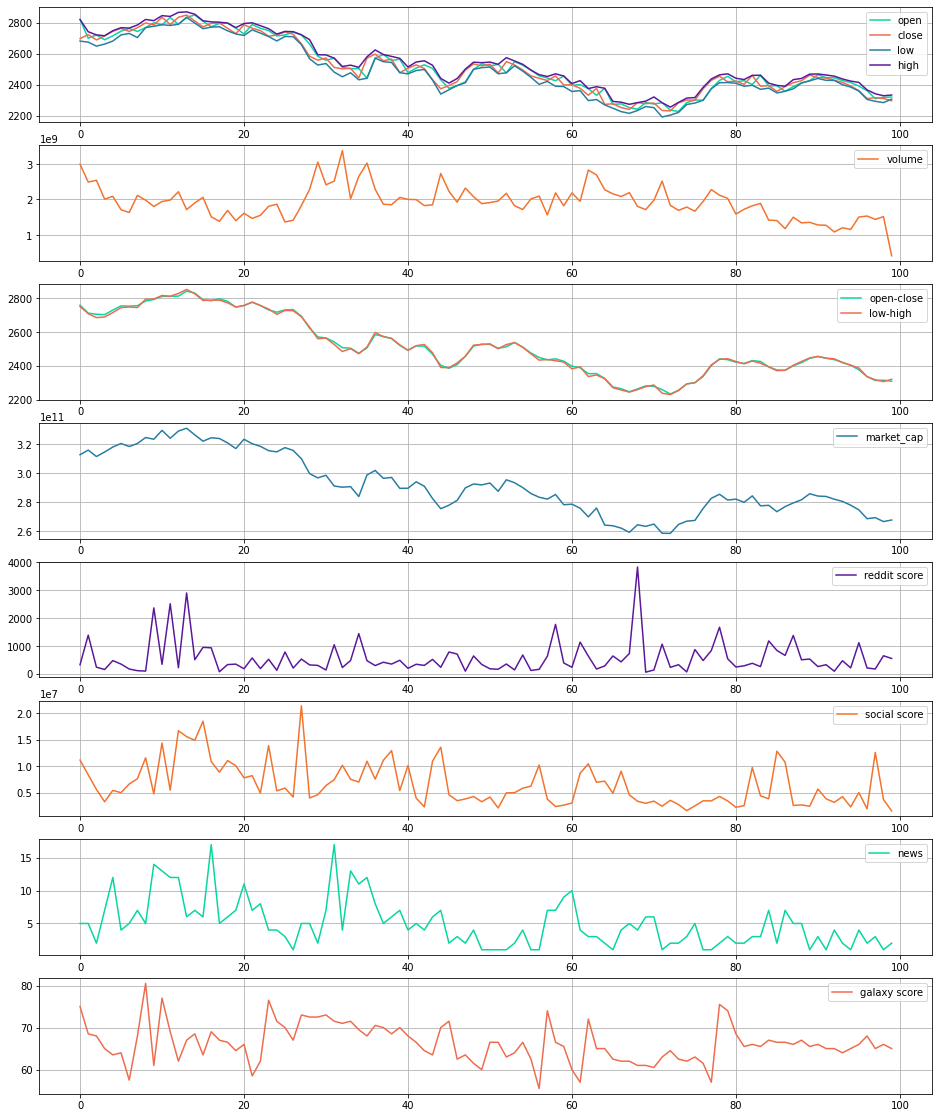

In [26]:
stats = getCurrencyStats('ETH')
plotStats(stats)

In [27]:
def saveStats(data, name):
    with open('stats/'+str(name)+".stat", 'wb') as f:
        pickle.dump(data, f)
        
def readStats(name):
    with open('stats/'+str(name)+".stat", 'rb') as f:
        return pickle.load(f)

In [28]:
def saveData():
    for i in range(10):
        stats = getCurrencyStats('ETH', endPoint=stampNow()-dayStamp()*i, data_points = 30)
        saveStats(stats, "stats_eth_"+str(i))

In [29]:
saveData()

Got it
Got it
Got it
Got it
Got it
Got it
Got it
Got it
Got it
Got it


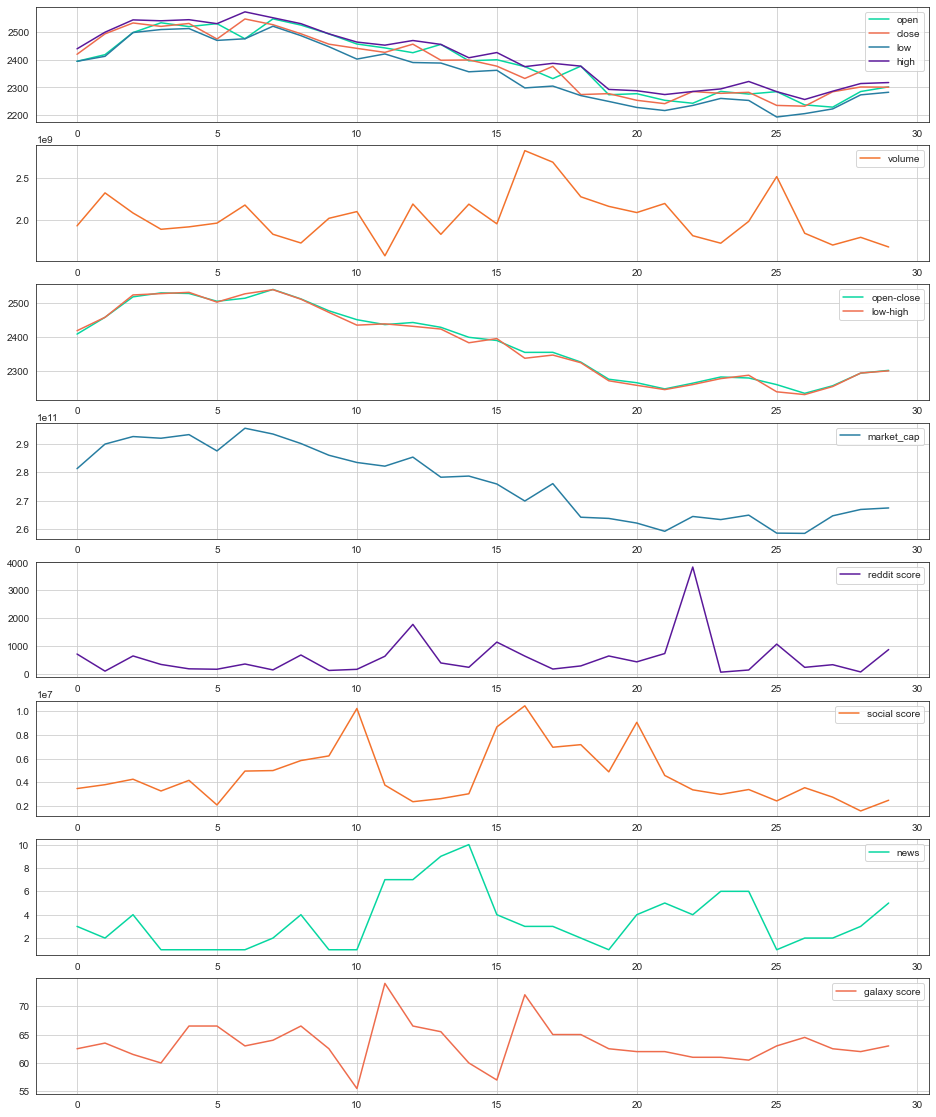

In [36]:
plotStats(readStats("stats_eth_1"))